In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from Plasma import Plasma_Evolver

In [3]:

N = 128
dt = 0.01
nonreg = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0, insertion=False, rk = True)
reg1 = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.01, insertion=False, rk = True)
reg2 = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.1, insertion=False, rk = True)


In [4]:
delta_in = 0.02
x0 = 1/16

x = np.linspace(0, 1, 1000)
y_nonreg = nonreg.kd(x, 1/2)
y_reg1 = reg1.kd(x,1/2)
y_reg2 = reg2.kd(x,1/2)

#error = np.abs(reg - no_reg)

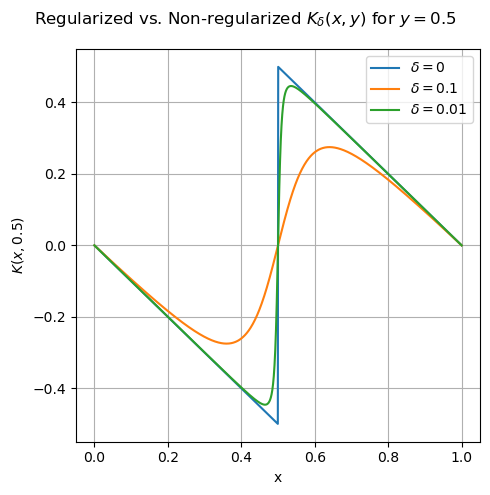

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

fig.suptitle("Regularized vs. Non-regularized $K_\delta(x,y)$ for $y = 0.5$")

ax.plot(x, y_nonreg, label=r'$\delta = 0$')
ax.plot(x, y_reg2, label=r'$\delta = 0.1$')
ax.plot(x, y_reg1, label=r'$\delta = 0.01$')

ax.set_xlabel("x")
ax.set_ylabel(r'$K(x,0.5)$')
ax.grid()
ax.legend()

fig.tight_layout()

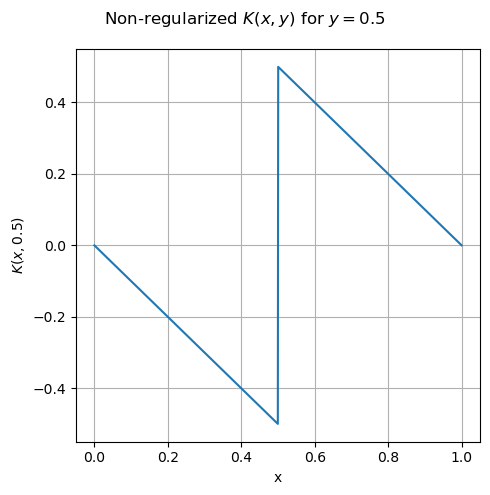

In [29]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

fig.suptitle("Non-regularized $K(x,y)$ for $y = 0.5$")

ax.plot(x, y_nonreg, label=r'$\delta = 0$')

ax.set_xlabel("x")
ax.set_ylabel(r'$K(x,0.5)$')
ax.grid()

fig.tight_layout()


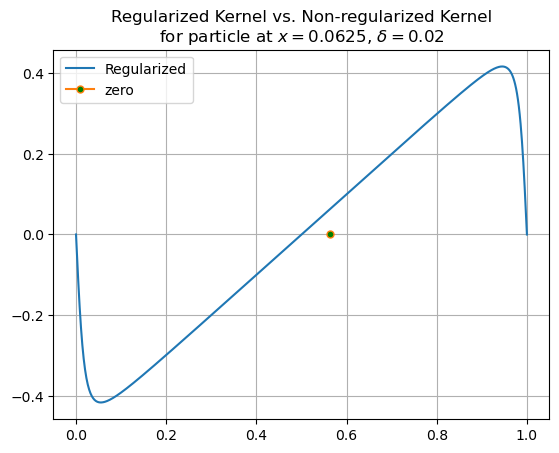

In [6]:
#plt.plot(x,no_reg, label="Not Regularized")
plt.plot(x, reg1, label="Regularized")
plt.grid()
plt.plot((x0 + 0.5) % 1, 0, marker="o", markersize=5, markerfacecolor="green", label = "zero")
plt.title(r'Regularized Kernel vs. Non-regularized Kernel' '\n' r'for particle at $x = {}$, $\delta = {}$'.format(x0, delta_in))
plt.legend()

In [7]:
""" plt.semilogy(x, error, label="Log Absolute Error")
plt.vlines(x0, 1e-9, 1, linestyles='--', colors='r', label="Reference Particle Position")
plt.grid()
plt.title(r'Log Absolute Error for $\delta = {}$ for particle at $x={}$'.format(delta_in, x0))
plt.legend()
plt.show() """

' plt.semilogy(x, error, label="Log Absolute Error")\nplt.vlines(x0, 1e-9, 1, linestyles=\'--\', colors=\'r\', label="Reference Particle Position")\nplt.grid()\nplt.title(r\'Log Absolute Error for $\\delta = {}$ for particle at $x={}$\'.format(delta_in, x0))\nplt.legend()\nplt.show() '

In [8]:
N = 4

pos = np.array([(i - 0.5)/N for i in range(1,N+1)])

diff_matrix = np.abs(pos[:, np.newaxis] - pos[np.newaxis, :])

total_potential = np.sum(np.triu(-0.5 * diff_matrix))

print(diff_matrix)
print(total_potential)


[[0.   0.25 0.5  0.75]
 [0.25 0.   0.25 0.5 ]
 [0.5  0.25 0.   0.25]
 [0.75 0.5  0.25 0.  ]]
-1.25


In [9]:
a = np.array([1,2,3,4])
w = np.linspace(0,3,4)
p = a[:, np.newaxis] * a[np.newaxis, :]
b = np.transpose(np.tile(a, (a.shape[0], 1)))
print(p)

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
